<a href="https://colab.research.google.com/github/WabukoWabuko/carsDataAnalysis/blob/main/CarsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cars Analysis and Predictions**


In [ ]:
# Importing the necessary libraries needed in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the given dataset, which is in .xlsx format

data = pd.read_excel("/content/drive/MyDrive/carsThings/car_prices data.xlsm")

data.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [ ]:
# MMR means Manheim Market Report

In [ ]:
# Returning all columns with null values
data.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [ ]:
# Checking the number of rows and columns in the given dataset
data.shape

(558837, 16)

In [ ]:
# Dropping all the rows that have null values

data = data.dropna(axis=0)
data.shape

(472325, 16)

In [ ]:
# Randomly shuffling data to train an ML model
data.sample(frac=1)
data.iloc[:10]
data

year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558831  2011     BMW             5 Series         528i      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer  color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0  white   
1         automatic  5xyktca69fg561319    ca        5.0    9393.0  white   
2         automatic  wba3c1c51ek116351    ca       45.0    1331.0   gray   
3         automatic  yv1612tb4f1310987    ca       41.0   14282.0  white   
4         automatic  wba6b2c57ed129731    ca       43.0    2641.0   gray   
...             ...                ...   ...        ...       ...    ...   
558831    automatic  wbafr1c53bc744672    fl       39.0   66403.0  white   
558833    automatic  3c6td5et6cg112407    wa        5.0   54393.0  white   
558834    automatic  5uxzw0c58cl668465    ca       48.0   50561.0  black   
558835    automatic  1n4al3ap0fc216050    ga       38.0   16658.0  white   
558836    automatic  1ftfw1et2eke87277    ca       34.0   15008.0   gray   

       interior                                             seller      mmr  \
0         black                            kia motors america  inc  20500.0   
1         beige                            kia motors america  inc  20800.0   
2         black             financial services remarketing (lease)  31900.0   
3         black                            volvo na rep/world omni  27500.0   
4         black             financial services remarketing (lease)  66000.0   
...         ...                                                ...      ...   
558831    brown           lauderdale imports ltd bmw pembrok pines  20300.0   
558833    black                                    i -5 uhlmann rv  30200.0   
558834    black             financial services remarketing (lease)  29800.0   
558835    black  enterprise vehicle exchange / tra / rental / t...  15100.0   
558836     gray                   ford motor credit company llc pd  29600.0   

        sellingprice                                 saledate  
0            21500.0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1            21500.0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2            30000.0  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3            27750.0  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4            67000.0  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)  
...              ...                                      ...  
558831       22800.0  Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)  
558833       30800.0  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558834       34000.0  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558835       11100.0  Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)  
558836       26700.0  Thu May 28 2015 05:30:00 GMT-0700 (PDT)  

[472325 rows x 16 columns]

In [ ]:
# Describing the state of the data, remember to assume the column 'year'
data.describe()

year      condition       odometer            mmr  \
count  472325.000000  472325.000000  472325.000000  472325.000000   
mean     2010.210980      30.774177   66701.732040   13837.058964   
std         3.822151      13.286866   51939.586894    9532.229273   
min      1990.000000       1.000000       1.000000      25.000000   
25%      2008.000000      24.000000   28137.000000    7425.000000   
50%      2012.000000      35.000000   51085.000000   12300.000000   
75%      2013.000000      41.000000   96590.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  472325.000000  
mean    13690.512058  
std      9613.033738  
min         1.000000  
25%      7200.000000  
50%     12200.000000  
75%     18200.000000  
max    230000.000000

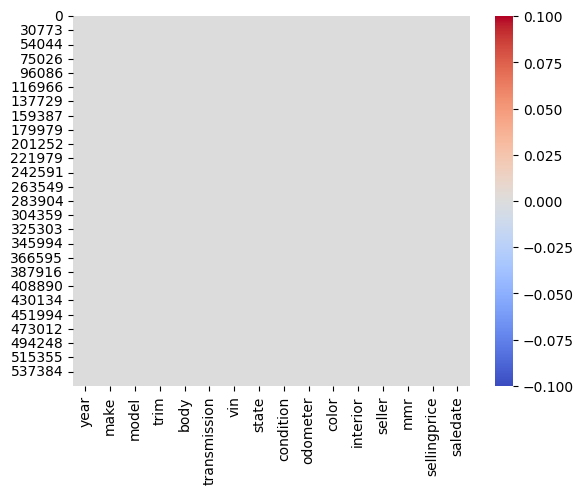

In [ ]:
# HeatMap to check null values or missing values

sns.heatmap(data.isnull(),cmap="coolwarm")
plt.show()

# Let's take a closer look at 'condition', 'odometer', 'mmr', 'selling price'

<ipython-input-26-82e57a1a84e0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['condition'],color="purple",bins=15,hist_kws={'alpha':0.2})
<ipython-input-26-82e57a1a84e0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['odometer'],color="green",bins=15,hist_kws={'alpha':0.2})


<Axes: xlabel='odometer', ylabel='Density'>

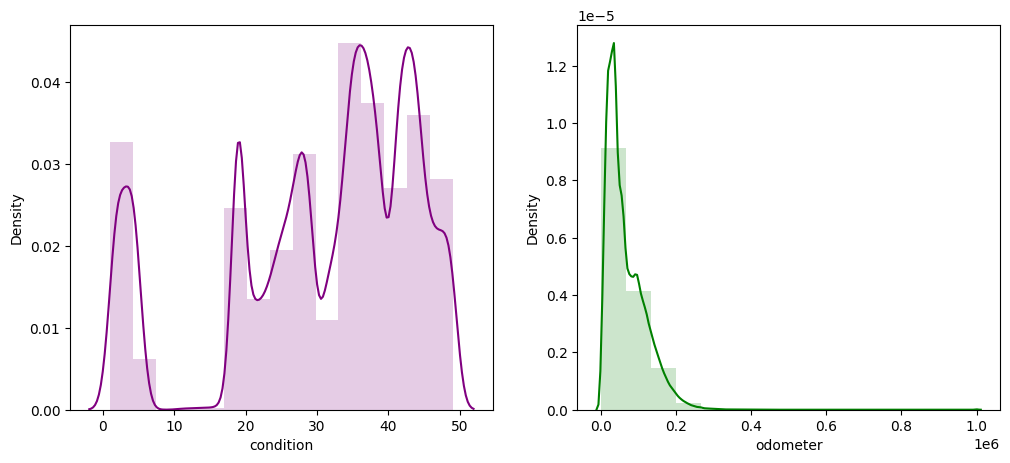

In [ ]:
# Density of the following

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(data['condition'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(data['odometer'],color="green",bins=15,hist_kws={'alpha':0.2})


<ipython-input-28-fb1e13a46c5f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mmr'],color="blue",bins=15,hist_kws={'alpha':0.2})
<ipython-input-28-fb1e13a46c5f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sellingprice'],color="orange",bins=15,hist_kws={'alpha':0.2})


<Axes: xlabel='sellingprice', ylabel='Density'>

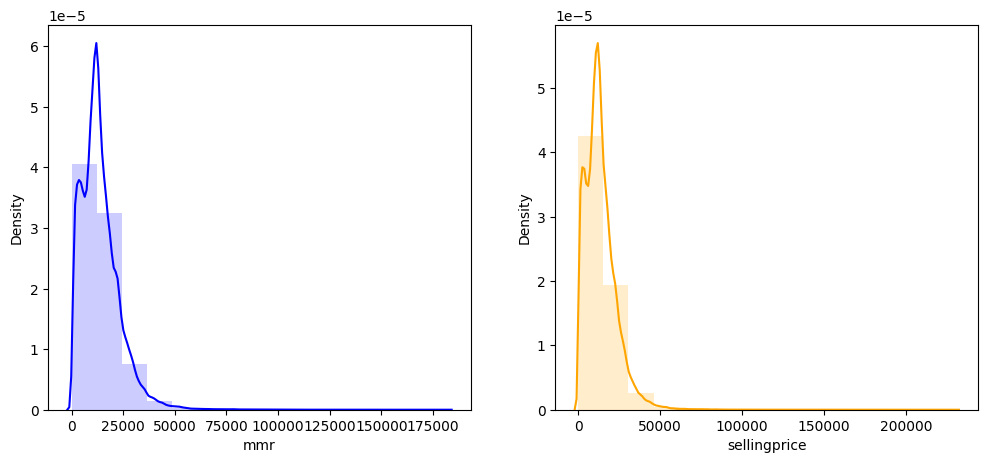

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(data['mmr'],color="blue",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(data['sellingprice'],color="orange",bins=15,hist_kws={'alpha':0.2})

# Confirming if the dataset is balanced or not. If found imbalanced, we would have to downsample some targets which are more in quantity.

<ipython-input-35-2a5ba950251b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='model',data=data, palette="plasma_r")


<Axes: xlabel='count', ylabel='model'>

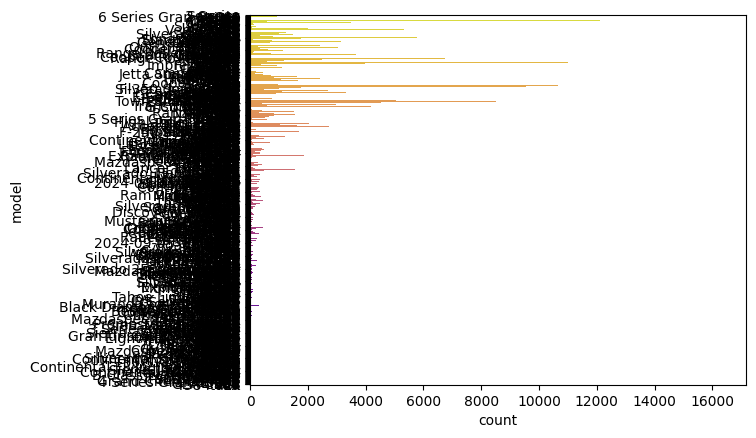

In [ ]:
sns.countplot(y='model',data=data, palette="plasma_r")

# Plotting to visualize the diagonal distribution between features for all the combinations
# Visualizing how classes differ from each other in a particular space.

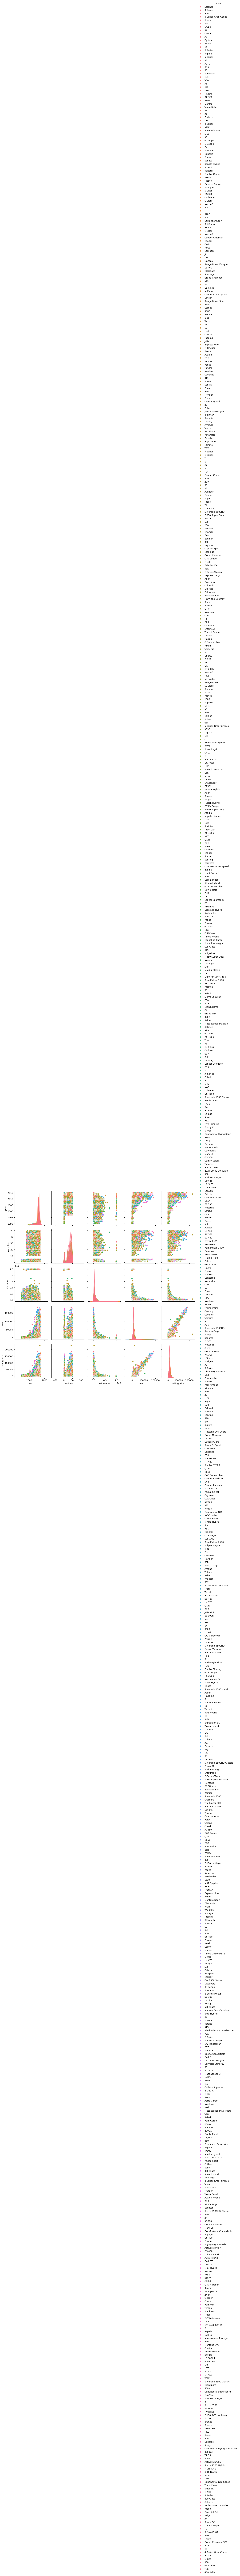

In [ ]:
sns.pairplot(data, hue = 'model')

# Selling Price Average/Mean was found to be 13690, and used the year 1990 as its average too though not very much logical.
# The plot shows the selling price of vehicles between 1990 and 2015, and at the same time shows the car models that were sold in a certain year.

<ipython-input-46-36a2a8d67c97>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to make room for legend


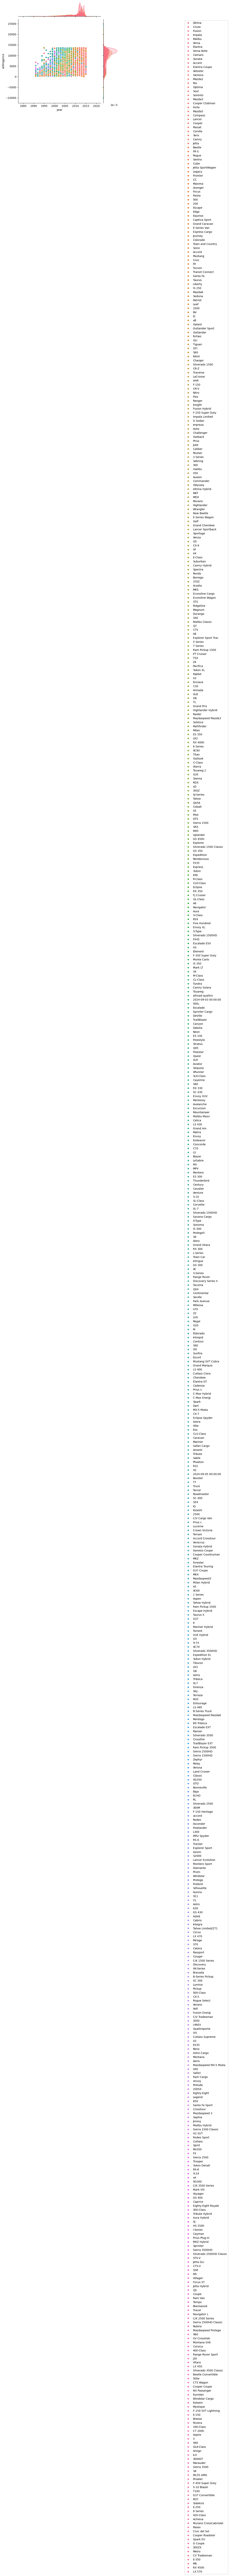

In [ ]:
# Average

sns.jointplot(x="year",y="sellingprice",data=data[(data['sellingprice']<13690) & (data['year']>1990)],hue="model")
# Move legend outside
plt.legend(bbox_to_anchor=(2, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for legend


<ipython-input-49-d69fb45baaac>:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to make room for legend


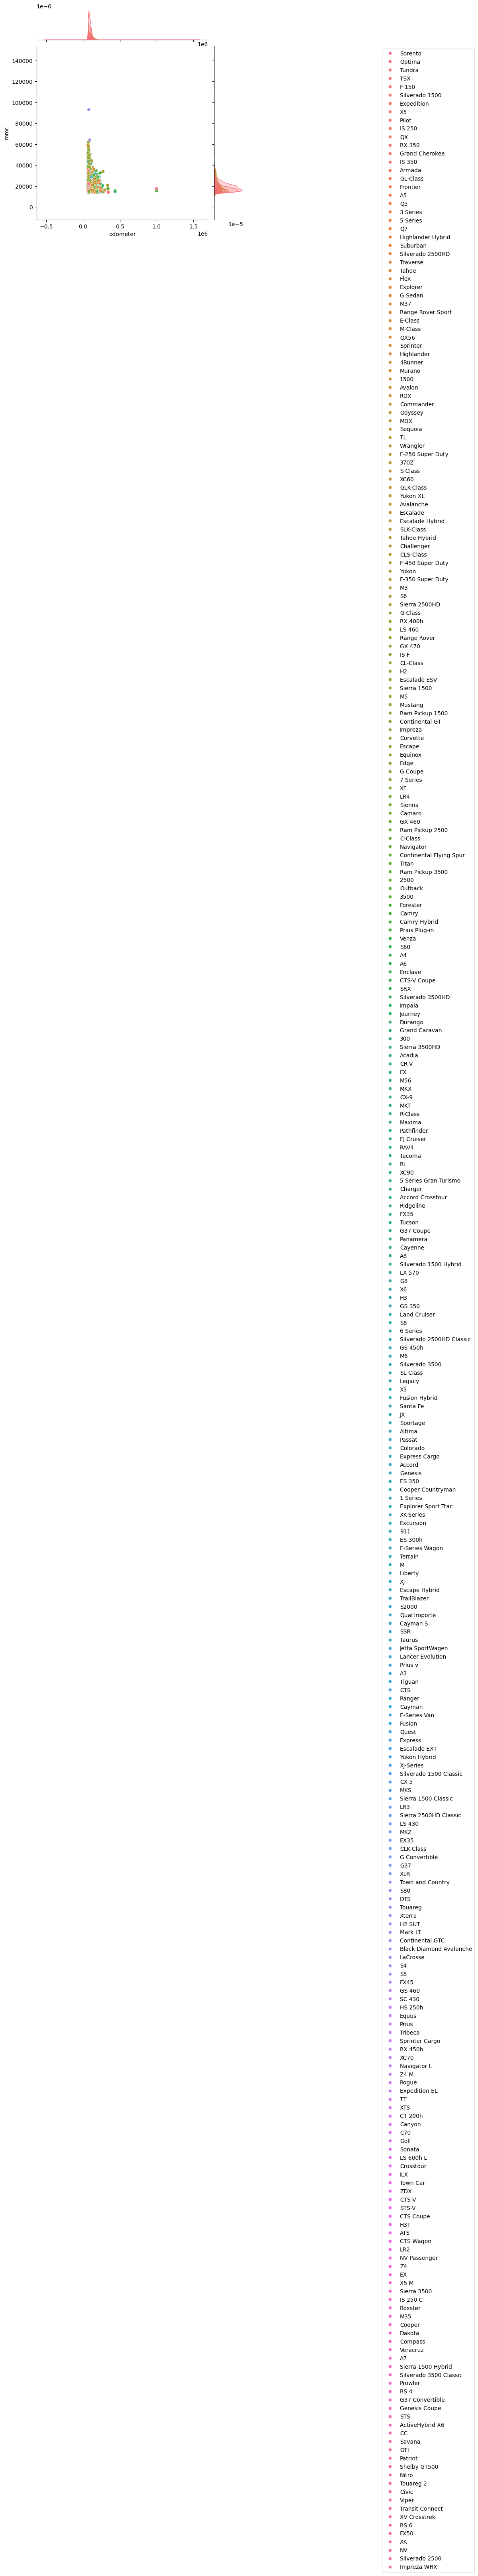

In [ ]:
sns.jointplot(x="odometer",y="mmr",data=data[(data['mmr']>13837)&(data['odometer']>66701)],hue="model")
# Move legend outside
plt.legend(bbox_to_anchor=(2, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for legend

<ipython-input-50-16c1843acd99>:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to make room for legend


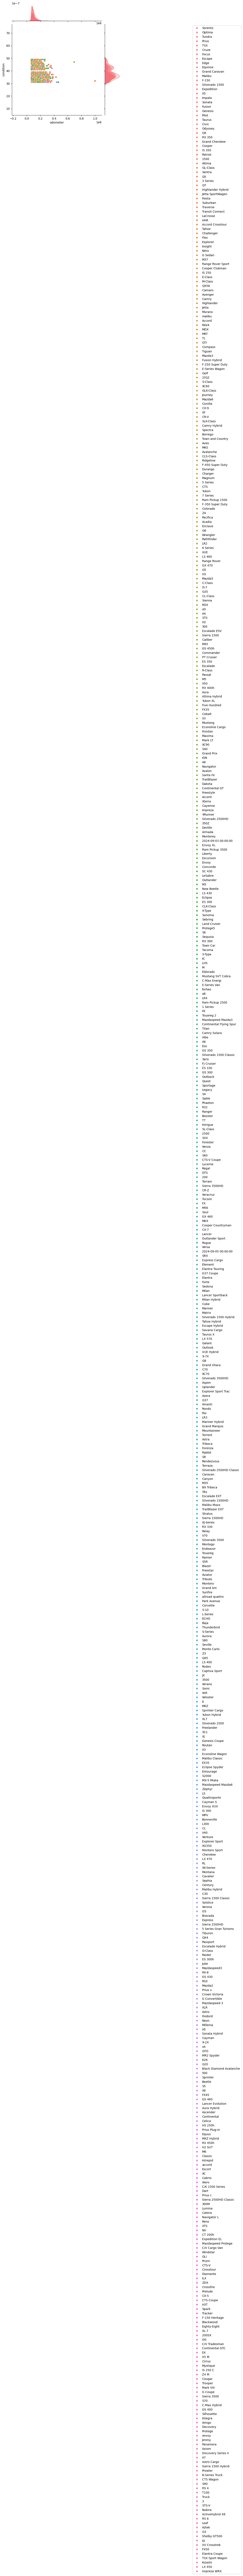

In [ ]:
sns.jointplot(x="odometer",y="condition",data=data[(data['condition']>30)&(data['odometer']>66701)],hue="model")
# Move legend outside
plt.legend(bbox_to_anchor=(2, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for legend

<Axes: xlabel='sellingprice', ylabel='model'>

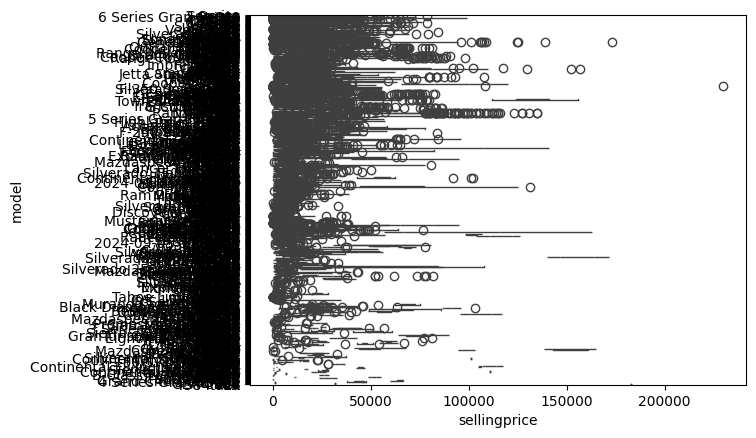

In [ ]:
sns.boxplot(y='model',x='sellingprice',data=data)

<Axes: xlabel='mmr', ylabel='model'>

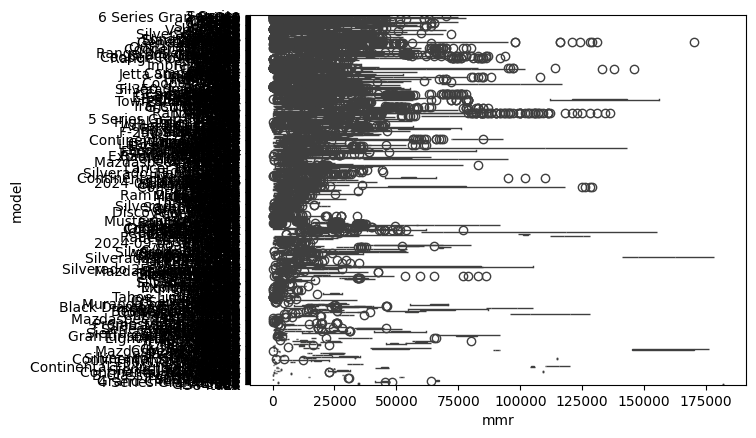

In [ ]:
sns.boxplot(y='model',x='mmr',data=data)


<Axes: xlabel='mmr', ylabel='model'>

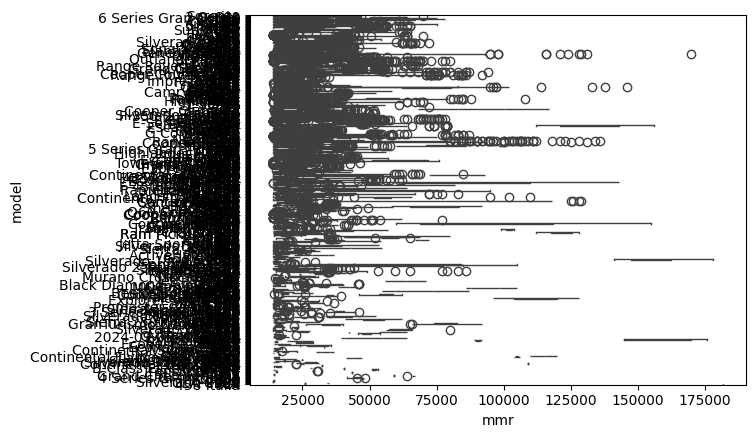

In [ ]:
sns.boxplot(y='model',x='mmr',data=data[data['mmr']>13837])

<ipython-input-59-8395ead3749c>:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to make room for legend


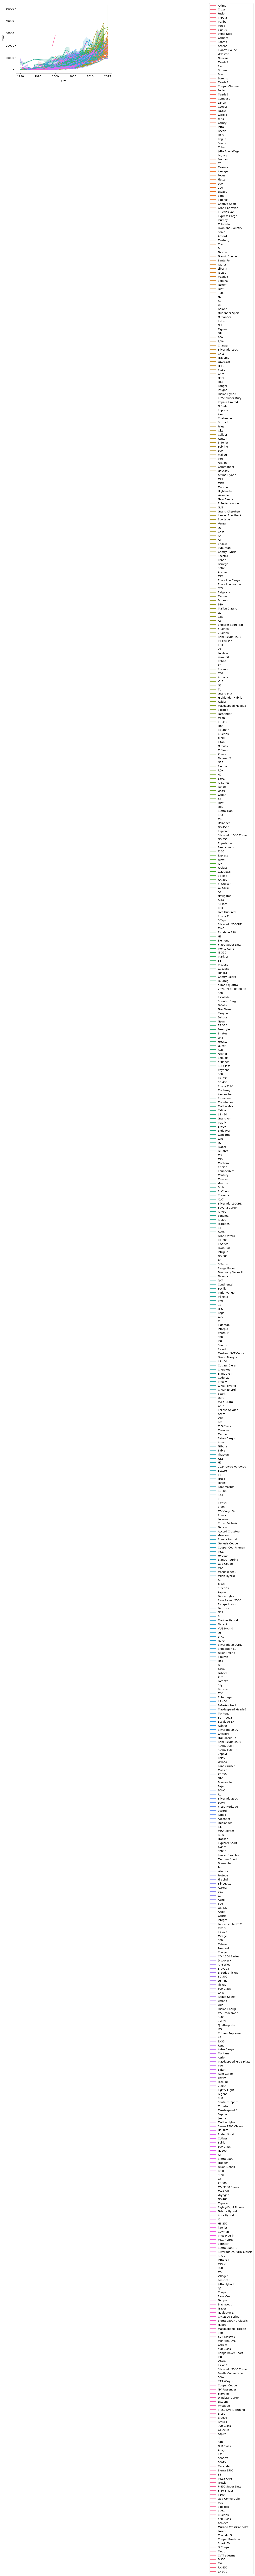

In [ ]:
sns.lineplot(data = data[(data['sellingprice']<13690)], x = "year", y = "mmr",hue="model")
# Move legend outside
plt.legend(bbox_to_anchor=(2, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for legend

In [ ]:
data.describe()

year      condition       odometer            mmr  \
count  472325.000000  472325.000000  472325.000000  472325.000000   
mean     2010.210980      30.774177   66701.732040   13837.058964   
std         3.822151      13.286866   51939.586894    9532.229273   
min      1990.000000       1.000000       1.000000      25.000000   
25%      2008.000000      24.000000   28137.000000    7425.000000   
50%      2012.000000      35.000000   51085.000000   12300.000000   
75%      2013.000000      41.000000   96590.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  472325.000000  
mean    13690.512058  
std      9613.033738  
min         1.000000  
25%      7200.000000  
50%     12200.000000  
75%     18200.000000  
max    230000.000000

# **Data Preprocessing**